# More Important Functions
### value_counts
### sort_values
### rank
### sort index
### set index
### rename index -> rename
### reset index
### unique & nunique
### isnull/notnull/hasnans
### dropna
### fillna
### drop_duplicates
### drop
### apply
### isin
### corr
### nlargest -> nsmallest
### insert
### copy 

In [1]:
import numpy as np
import pandas as pd


In [2]:
# value_counts(series and dataframes)\
a=pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print(a.value_counts())

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: count, dtype: int64


In [3]:
marks=pd.DataFrame([
    [50,60,70],
    [80,90,100],
    [50,60,70],
    [80,90,100],
    [80,98,76]
],columns=['iq','marks','package'])

In [4]:
marks

,iq,marks,package
0,50,60,70
1,80,90,100
2,50,60,70
3,80,90,100
4,80,98,76


In [5]:
marks.value_counts()

iq  marks  package
50  60     70         2
80  90     100        2
    98     76         1
Name: count, dtype: int64

In [6]:
# find the player has won potm -> in finals and qualifiers
ipl=pd.read_csv('ipl-matches.csv')
ipl.head(2)


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [7]:
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

<Axes: ylabel='count'>

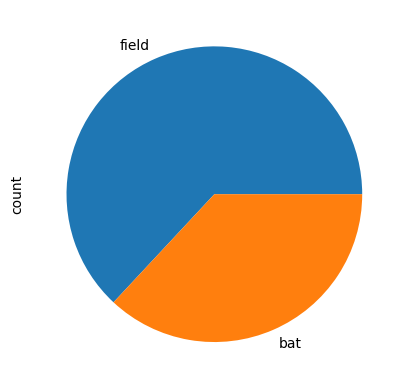

In [8]:
# toss decision plot
ipl['TossDecision'].value_counts().plot(kind='pie')

In [9]:
# how many matches were played by each team
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [10]:
# sort_values(series and dataframes)
a=pd.Series([1,10,2,13,4,3,2,19])
a.sort_values(ascending=False)

7    19
3    13
1    10
4     4
5     3
2     2
6     2
0     1
dtype: int64

In [11]:
movies=pd.read_csv('movies.csv')

In [12]:
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [13]:
movies.sort_values('title_x')

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1498,16 December (film),tt0313844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/16_December_(film),16-Dec,16-Dec,0,2002,158,Action|Thriller,6.9,1091,16 December 1971 was the day when India won t...,Indian intelligence agents race against time t...,NaN,Danny Denzongpa|Gulshan Grover|Milind Soman|Di...,2 nominations,22 March 2002 (India)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


In [14]:
movies.sort_values(['title_x','imdb_rating'],ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)


In [15]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [16]:
students.sort_values('name',)

,name,college,branch,cgpa,package
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [17]:
students.sort_values('name',na_position='first',ascending=False,inplace=True)

In [18]:
movies.sort_values(['year_of_release','title_x'],ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


In [19]:
# rank(series)
batsman=pd.read_csv('batsman_runs_ipl.csv')

In [20]:
batsman.head(2)

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161


In [21]:
batsman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   batter       605 non-null    object
 1   batsman_run  605 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.6+ KB


In [22]:
batsman['batting_rank']=batsman['batsman_run'].rank(ascending=False)

In [23]:
batsman.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


In [24]:
# sort_index(series and dataframes)
marks={
    'maths':67,
    'physics':89,
    'chemistry':78,
    'english':90,
    'hindi':78,
    'biology':89

}
marks_series=pd.Series(marks)
marks_series

maths        67
physics      89
chemistry    78
english      90
hindi        78
biology      89
dtype: int64

In [25]:
marks_series.sort_index()

biology      89
chemistry    78
english      90
hindi        78
maths        67
physics      89
dtype: int64

In [26]:
# sort_index -> dataframe
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [27]:
# set_index(dataframe) 
batsman.set_index('batter')


,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [28]:
batsman.set_index('batter',inplace=True)

In [29]:
# reset_index(series and dataframes)
batsman.reset_index(inplace=True)

In [30]:
batsman

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [31]:
# how to replace existing index without loosing
batsman.reset_index().set_index('batting_rank')

,index,batter,batsman_run
batting_rank,,,
166.5,0,A Ashish Reddy,280
226.0,1,A Badoni,161
535.0,2,A Chandila,4
329.0,3,A Chopra,53
402.5,4,A Choudhary,25
...,...,...,...
594.0,600,Yash Dayal,0
343.0,601,Yashpal Singh,47
547.5,602,Younis Khan,3


In [32]:
# series to dataframes using reset_index
marks_series.reset_index()

,index,0
0,maths,67
1,physics,89
2,chemistry,78
3,english,90
4,hindi,78
5,biology,89


In [33]:
type(marks_series.reset_index())

pandas.core.frame.DataFrame

In [34]:
# rename(dataframe)-> index
movies.set_index('title_x',inplace=True)

In [36]:
movies.rename(columns={'imdb_id':'imdb','poster_path':'link'},inplace=True)

In [37]:
movies.rename(index={'The Dark Knight':'Dark Knight','Uri: The Surgical Strike':'Uri'},inplace=True)

In [38]:
# unique (series)
pd.Series([1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7]).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [39]:
ipl['Season'].unique()

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

In [40]:
len(ipl['Season'].unique())

15

In [41]:
ipl['Season'].nunique()

15

### The major difference between len(unique) and nunique is that nunique does not count nan values while first one does.

In [43]:
# isnull (series and dataframes)
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [47]:
students['name'][students['name'].isnull()]

3    NaN
5    NaN
7    NaN
9    NaN
Name: name, dtype: object

In [49]:
# not null  (series and dataframes)
students['name'][students['name'].notnull()]
# it is just opposite of isnull

2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [55]:
# has nan (series )
students['name'].hasnans
## it tells in one go whether data set contains a missing value or not

True

In [52]:
students.isnull()

,name,college,branch,cgpa,package
3,True,True,True,True,True
5,True,False,False,False,False
7,True,True,False,False,False
9,True,False,True,True,True
2,False,False,False,False,False
6,False,False,False,False,False
0,False,False,False,False,False
4,False,True,False,False,False
1,False,False,False,False,False
8,False,True,False,False,True


In [53]:
students.notnull()

,name,college,branch,cgpa,package
3,False,False,False,False,False
5,False,True,True,True,True
7,False,False,True,True,True
9,False,True,False,False,False
2,True,True,True,True,True
6,True,True,True,True,True
0,True,True,True,True,True
4,True,False,True,True,True
1,True,True,True,True,True
8,True,False,True,True,False


In [56]:
# dropna (series and dataframes)
students['name'].dropna()

2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [58]:
students.dropna()

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0


In [59]:
students.dropna(how='all')

,name,college,branch,cgpa,package
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [60]:
students.dropna(subset=['name','college'])

,name,college,branch,cgpa,package
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0


In [61]:
# fillna (series and dataframes)
students.fillna(0)

,name,college,branch,cgpa,package
3,0,0,0,0.00,0.0
5,0,vlsi,ce,9.00,7.0
7,0,0,cse,10.00,9.0
9,0,git,0,0.00,0.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,0,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,0,bio,7.40,0.0


In [62]:
students['package'].fillna(students['package'].mean())

3    6.428571
5    7.000000
7    9.000000
9    6.428571
2    6.000000
6    8.000000
0    4.000000
4    6.000000
1    5.000000
8    6.428571
Name: package, dtype: float64

# In above function there are 2 hidden parameters
### ffill -> forward fill
### bfill -> backward fill

In [63]:
students['name'].fillna(method='ffill')

C:\Users\Ashish Gupta\AppData\Local\Temp\ipykernel_1608\538422019.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['name'].fillna(method='ffill')


3           NaN
5           NaN
7           NaN
9           NaN
2        rupesh
6       rishabh
0        nitish
4    mrityunjay
1         ankit
8        aditya
Name: name, dtype: object

In [64]:
# drop duplicates (series and dataframes)
marks

{'maths': 67,
 'physics': 89,
 'chemistry': 78,
 'english': 90,
 'hindi': 78,
 'biology': 89}

In [66]:
marks.duplicated()

AttributeError: 'dict' object has no attribute 'duplicated'

In [69]:
students['name'].duplicated().sum()

3

In [72]:
students.drop_duplicates()

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [73]:
### find the last match played by Virat Kohli in Delhi

In [74]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [75]:
ipl['City']=='Delhi'

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947     True
948    False
949    False
Name: City, Length: 950, dtype: bool

In [76]:
ipl['all_players']=ipl['Team1Players']+ipl['Team2Players']

In [77]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."


In [78]:
def did_kohli_play(players_list):
    return 'V Kohli' in players_list



In [80]:
ipl['did_kohli_Play']=ipl['all_players'].apply(did_kohli_play)

In [85]:
ipl[(ipl['City']=='Delhi') & (ipl['did_kohli_Play']==True)]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_Play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True
269,1136605,Delhi,2018-05-12,2018,45,Delhi Daredevils,Royal Challengers Bangalore,Arun Jaitley Stadium,Royal Challengers Bangalore,field,...,Wickets,5.0,NaN,AB de Villiers,"['PP Shaw', 'JJ Roy', 'SS Iyer', 'RR Pant', 'V...","['PA Patel', 'MM Ali', 'V Kohli', 'AB de Villi...",KN Ananthapadmanabhan,HDPK Dharmasena,"['PP Shaw', 'JJ Roy', 'SS Iyer', 'RR Pant', 'V...",True
318,1082646,Delhi,2017-05-14,2017,56,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,bat,...,Runs,10.0,NaN,HV Patel,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['CH Gayle', 'Vishnu Vinod', 'V Kohli', 'TM He...",CK Nandan,C Shamshuddin,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...",True
467,829757,Delhi,2015-04-26,2015,26,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Wickets,10.0,NaN,VR Aaron,"['MA Agarwal', 'SS Iyer', 'JP Duminy', 'Yuvraj...","['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...",M Erasmus,S Ravi,"['MA Agarwal', 'SS Iyer', 'JP Duminy', 'Yuvraj...",True
571,598054,Delhi,2013-05-10,2013,57,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,Runs,4.0,NaN,JD Unadkat,"['DPMD Jayawardene', 'V Sehwag', 'UBT Chand', ...","['CA Pujara', 'CH Gayle', 'V Kohli', 'MC Henri...",NJ Llong,K Srinath,"['DPMD Jayawardene', 'V Sehwag', 'UBT Chand', ...",True
638,548372,Delhi,2012-05-17,2012,67,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,Runs,21.0,NaN,CH Gayle,"['UBT Chand', 'DA Warner', 'Y Venugopal Rao', ...","['CH Gayle', 'TM Dilshan', 'V Kohli', 'AB de V...",HDPK Dharmasena,C Shamshuddin,"['UBT Chand', 'DA Warner', 'Y Venugopal Rao', ...",True
746,501227,Delhi,2011-04-26,2011,30,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Wickets,3.0,NaN,V Kohli,"['DA Warner', 'V Sehwag', 'JR Hopes', 'MS Wade...","['CH Gayle', 'TM Dilshan', 'V Kohli', 'AB de V...",S Asnani,RJ Tucker,"['DA Warner', 'V Sehwag', 'JR Hopes', 'MS Wade...",True
801,419140,Delhi,2010-04-04,2009/10,35,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,bat,...,Runs,37.0,NaN,PD Collingwood,"['DA Warner', 'V Sehwag', 'G Gambhir', 'PD Col...","['JH Kallis', 'CL White', 'KP Pietersen', 'RV ...",BF Bowden,M Erasmus,"['DA Warner', 'V Sehwag', 'G Gambhir', 'PD Col...",True
933,335998,Delhi,2008-04-30,2007/08,17,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Runs,10.0,NaN,GD McGrath,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...","['P Kumar', 'W Jaffer', 'LRPL Taylor', 'JH Kal...",Aleem Dar,I Shivram,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...",True


In [86]:
ipl[(ipl['City']=='Delhi') & (ipl['did_kohli_Play']==True)].drop_duplicates(subset=['City','did_kohli_Play'],keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_Play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


In [87]:
# drop (series and dataframes)

temp=pd.Series([1,2,3,4,5,6,7,8,9,10])


In [88]:
temp.drop(index=[0,5])

1     2
2     3
3     4
4     5
6     7
7     8
8     9
9    10
dtype: int64

In [89]:
students

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


In [90]:
students.drop(columns=['branch','cgpa'])

,name,college,package
3,NaN,NaN,NaN
5,NaN,vlsi,7.0
7,NaN,NaN,9.0
9,NaN,git,NaN
2,rupesh,vit,6.0
6,rishabh,ssit,8.0
0,nitish,bit,4.0
4,mrityunjay,NaN,6.0
1,ankit,iit,5.0
8,aditya,NaN,NaN


In [91]:
students.drop(index=[0,8])

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0


In [92]:
students.set_index('name',inplace=True)

In [93]:
students

,college,branch,cgpa,package
name,,,,
NaN,NaN,NaN,NaN,NaN
NaN,vlsi,ce,9.00,7.0
NaN,NaN,cse,10.00,9.0
NaN,git,NaN,NaN,NaN
rupesh,vit,cse,6.41,6.0
rishabh,ssit,civ,7.40,8.0
nitish,bit,eee,6.66,4.0
mrityunjay,NaN,me,5.60,6.0
ankit,iit,it,8.25,5.0


In [94]:
students.drop(index=['nitish','aditya'])

,college,branch,cgpa,package
name,,,,
NaN,NaN,NaN,NaN,NaN
NaN,vlsi,ce,9.00,7.0
NaN,NaN,cse,10.00,9.0
NaN,git,NaN,NaN,NaN
rupesh,vit,cse,6.41,6.0
rishabh,ssit,civ,7.40,8.0
mrityunjay,NaN,me,5.60,6.0
ankit,iit,it,8.25,5.0


In [95]:
# apply (series and dataframes)
temp=pd.Series([10,20,30,40,50])

In [96]:
def sigmoid(value):
    return 1/(1+np.exp(-value))

In [97]:
temp.apply(sigmoid)

0    0.999955
1    1.000000
2    1.000000
3    1.000000
4    1.000000
dtype: float64

In [101]:
points_df=pd.DataFrame(
    {
        '1st point':[(3,4),(-6,8),(0,0),(-10,1),(4,5)],
        '2nd point':[(2,3),(4,5),(6,7),(8,9),(10,11)]
    }
)

In [102]:
points_df

,1st point,2nd point
0,"(3, 4)","(2, 3)"
1,"(-6, 8)","(4, 5)"
2,"(0, 0)","(6, 7)"
3,"(-10, 1)","(8, 9)"
4,"(4, 5)","(10, 11)"


In [103]:
def euclidean(row):
    pt_A=row['1st point']
    pt_B=row['2nd point']

    return np.sqrt((pt_B[0]-pt_A[0])**2+(pt_B[1]-pt_A[1])**2)

In [105]:
points_df['distance']=points_df.apply(euclidean,axis=1)

In [106]:
points_df

,1st point,2nd point,distance
0,"(3, 4)","(2, 3)",1.414214
1,"(-6, 8)","(4, 5)",10.440307
2,"(0, 0)","(6, 7)",9.219544
3,"(-10, 1)","(8, 9)",19.697716
4,"(4, 5)","(10, 11)",8.485281
